In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
import xgboost as xgb
import seaborn as sns
random_state=0

In [19]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [21]:
df= pd.read_csv('energy_data.csv')
df.head()
df = df.drop('Y2', axis=1) 

In [25]:
# Compute the correlation matrix
corr_matrix = df.corr()
corr_matrix

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430
X6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587
X7,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842
X8,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000


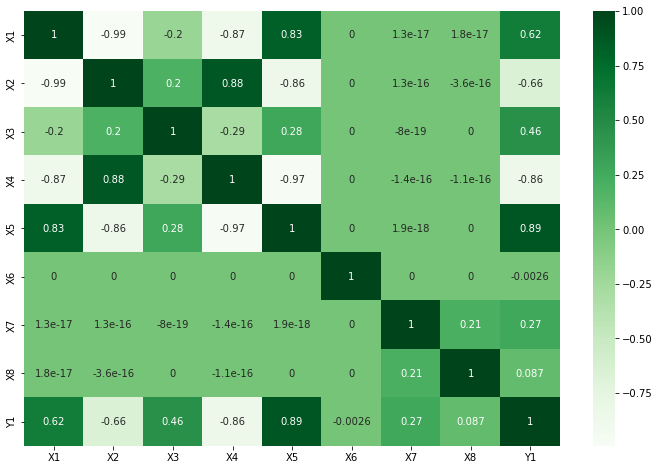

<Figure size 864x576 with 0 Axes>

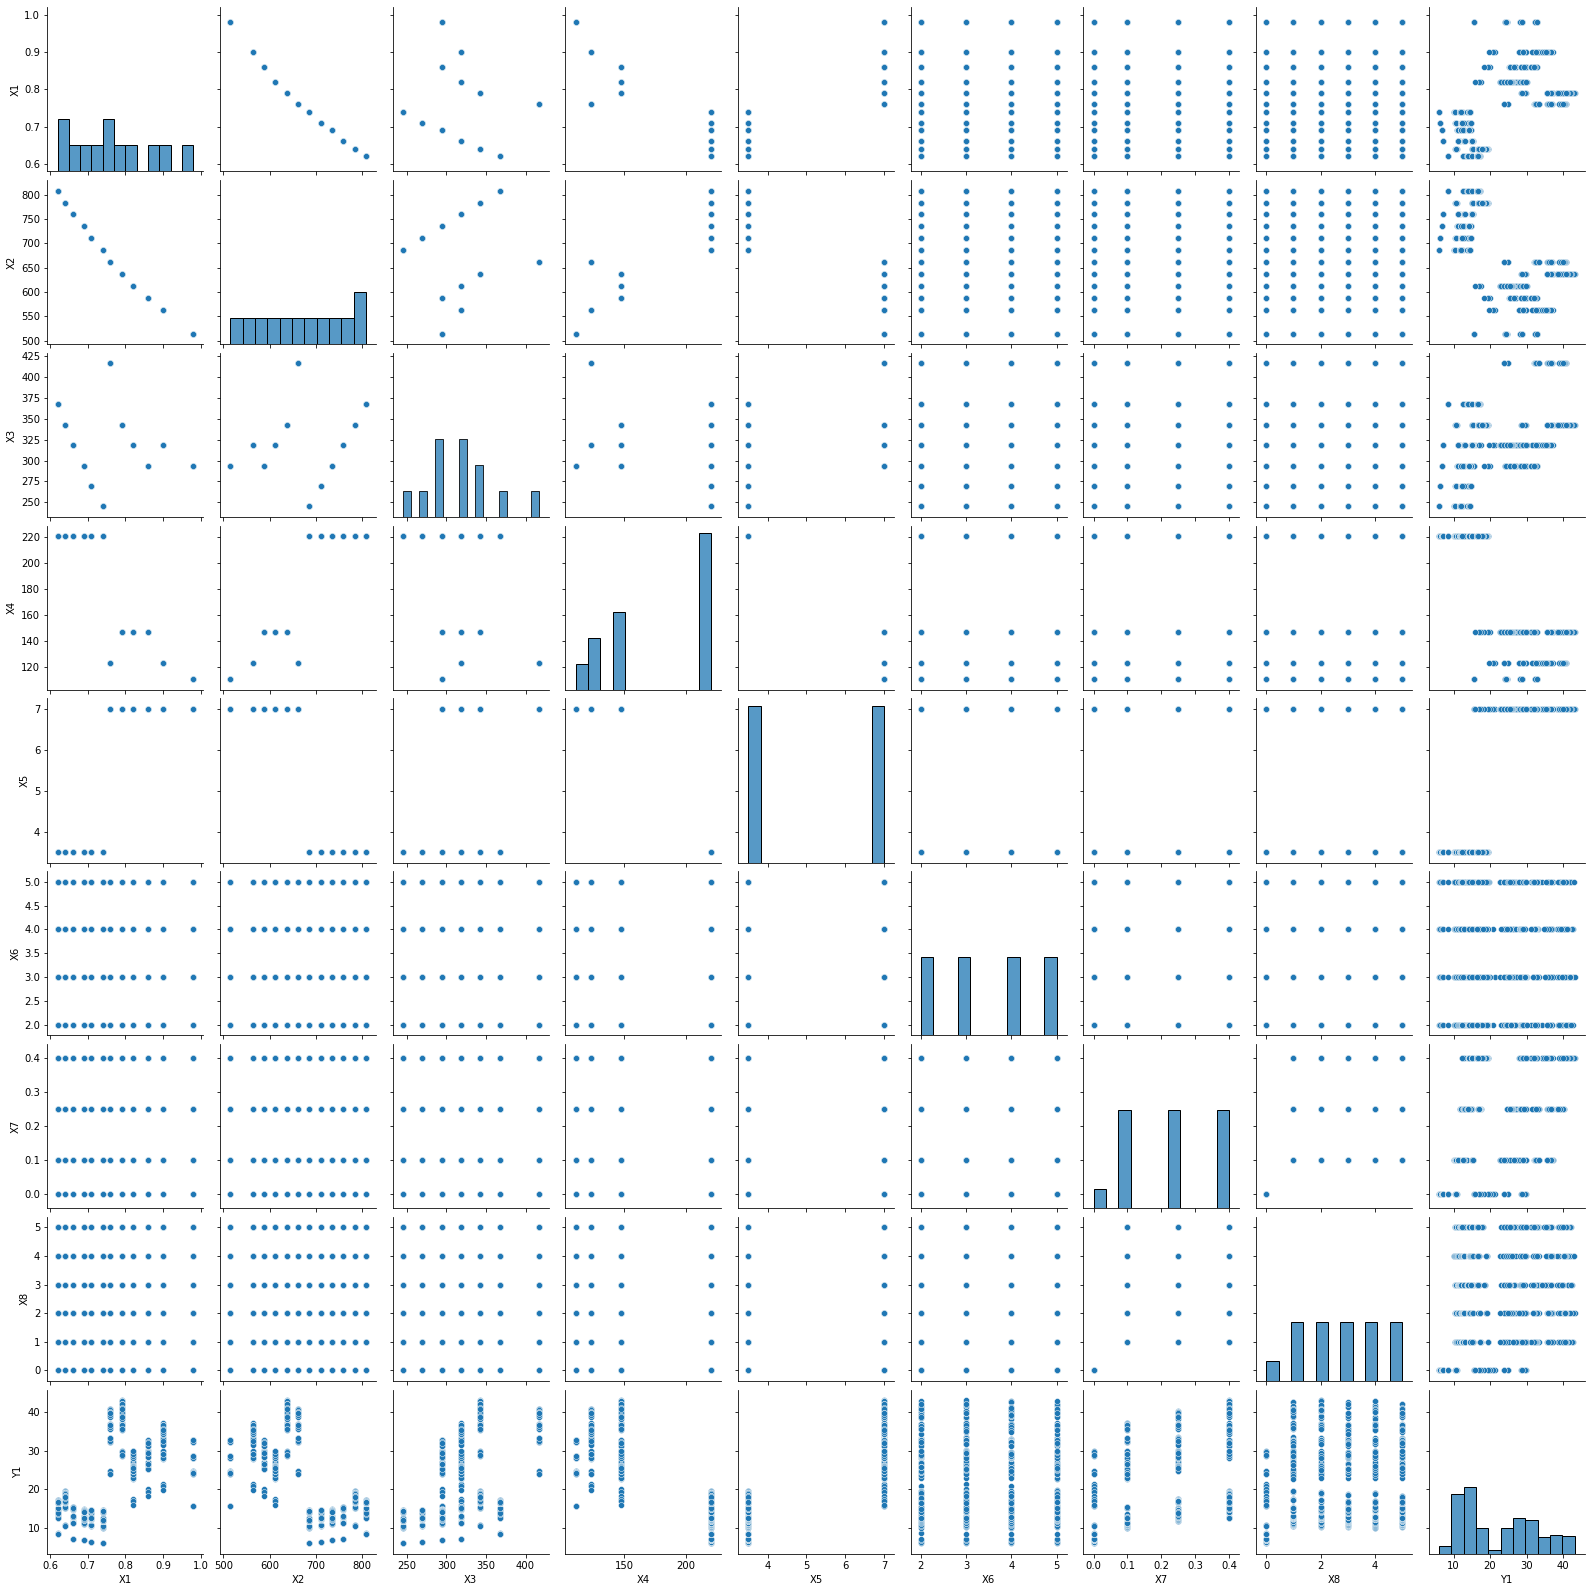

In [26]:

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Greens")
plt.savefig("heatmapenergy1.pdf", bbox_inches="tight")
plt.show()

#pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(df)
plt.savefig("pairplotenergy1.pdf", bbox_inches="tight")
plt.show()

In [3]:
X = df.iloc[:, :-1] 
y = df.iloc[:, -1] 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,random_state=0)

# Random Forest
ranf = RandomForestRegressor(random_state=0)
rf = ranf.fit(X_train, y_train)
scores_rf = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)

y_pred_rf = cross_val_predict(ranf, X_test, y_test)
scores_test_rf = cross_val_score(ranf, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_rf) * -1)

# Decision Tree
dectree = DecisionTreeRegressor(random_state=0)
dt = dectree.fit(X_train, y_train)
scores_dt = cross_val_score(dt, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)

y_pred_dt = cross_val_predict(dectree, X_test, y_test)
scores_test_dt = cross_val_score(dectree, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_dt) * -1)

# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
y_pred_knn = cross_val_predict(knn_model, X_test, y_test)
scores_test_knn = cross_val_score(knn_model, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_knn) * -1)

# Create an XGBoost regressor
xgb_reg = xgb.XGBRegressor(random_state=0)
scores_xgb = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_xgb = cross_val_predict(xgb_reg, X_test, y_test)
scores_test_xgb = cross_val_score(xgb_reg, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_xgb) * -1)

0.7514505416666644
0.7486958333333336
2.4422058333333334
0.5796967310905458


In [4]:
X1=X

In [5]:
X1

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [6]:
def normalize(X1):
    result = X1.copy()
    for feature_name in X1.columns:
        max_value = X1[feature_name].max()
        min_value = X1[feature_name].min()
        result[feature_name] = X1[feature_name] / (max_value - min_value)
    return result

X = normalize(X1)
print(X)

           X1        X2        X3        X4   X5        X6   X7   X8
0    2.722222  1.750000  1.714286  1.000000  2.0  0.666667  0.0  0.0
1    2.722222  1.750000  1.714286  1.000000  2.0  1.000000  0.0  0.0
2    2.722222  1.750000  1.714286  1.000000  2.0  1.333333  0.0  0.0
3    2.722222  1.750000  1.714286  1.000000  2.0  1.666667  0.0  0.0
4    2.500000  1.916667  1.857143  1.111111  2.0  0.666667  0.0  0.0
..        ...       ...       ...       ...  ...       ...  ...  ...
763  1.777778  2.666667  2.000000  2.000000  1.0  1.666667  1.0  1.0
764  1.722222  2.750000  2.142857  2.000000  1.0  0.666667  1.0  1.0
765  1.722222  2.750000  2.142857  2.000000  1.0  1.000000  1.0  1.0
766  1.722222  2.750000  2.142857  2.000000  1.0  1.333333  1.0  1.0
767  1.722222  2.750000  2.142857  2.000000  1.0  1.666667  1.0  1.0

[768 rows x 8 columns]


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-27-6510f845c510>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-27-6510f845c510>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val

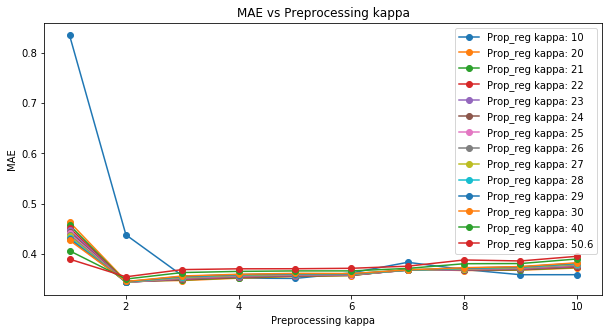

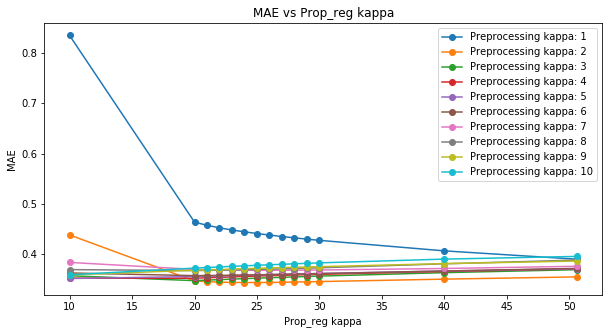

Optimal Preprocessing kappa: 2
Optimal Prop_reg kappa: 24
Minimum MAE: 0.34390810016843243


In [27]:
def preprocess_data(X_train, X_test, y_train, kappa, ordinal_columns):
    X_train, X_test = handle_categorical(X_train, X_test, y_train, ordinal_columns)
    X_train, X_test = handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns)
    return X_train, X_test


def handle_categorical(X_train, X_test, y_train, ordinal_columns):
    means = {}

    for col in X_train.columns:
        if col not in ordinal_columns:  # Categorical variable
            unique_values_train = X_train[col].unique()
            unique_values_test = X_test[col].unique()

            for val in unique_values_train:
                mean = y_train[X_train[col] == val].mean()
                means[(col, val)] = mean
                print(f"Column: {col}, Value: {val}, Mean: {mean}")

            for val in unique_values_test:
                if val not in unique_values_train:
                    print(f"Warning: Value {val} in column {col} of X_test is not in X_train.")

    for col, val in means:
        X_train.loc[X_train[col] == val, col] = means[(col, val)]
        X_test.loc[X_test[col] == val, col] = means[(col, val)]

    return X_train, X_test


def handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns):
    missing_values = {}

    for col in X_train.columns:
        if col in ordinal_columns:  # Ordinal variable
            unique_values_train = X_train[col].unique()
            unique_values_test = X_test[col].unique()

            for val in unique_values_test:
                y_train_np = y_train.to_numpy()
                X_train_col_np = X_train[[col]].to_numpy()
                X_test_col_val = val
                l = 0
                v = 0
                for j in range(X_train_col_np.shape[0]):
                    d = abs(X_test_col_val - X_train_col_np[j])
                    l += y_train_np[j] / ((1 + d) ** kappa)
                    v += 1 / ((1 + d) ** kappa)
                imputed_value = l / v
                missing_values[(col, val)] = imputed_value

            for val in unique_values_train:
                if val not in unique_values_test:
                    y_train_np = y_train.to_numpy()
                    X_train_col_np = X_train[[col]].to_numpy()
                    X_train_col_val = val
                    l = 0
                    v = 0
                    for j in range(X_train_col_np.shape[0]):
                        d = abs(X_train_col_val - X_train_col_np[j])
                        l += y_train_np[j] / ((1 + d) ** kappa)
                        v += 1 / ((1 + d) ** kappa)
                    imputed_value = l / v
                    missing_values[(col, val)] = imputed_value

    for col, val in missing_values:
        X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
        X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

    return X_train, X_test



def prop_reg(X_test,X_train,y_train,y_test,kappa):
    d = np.zeros((len(X_test),len(X_train)))
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            d[i,j] = np.linalg.norm(X_test[i]-X_train[j])
    c=np.zeros(len(y_test))
    for i in range(len(y_test)):
        l=0
        v=0
        for j in range(len(y_train)):
            
            l+=y_train[j]/((1+d[i,j])**kappa)
            v+=1/((1+d[i,j])**kappa)
        
        c[i]=l/v
    return(c)


def kfold_cv(X, y, ordinal_columns, kappa_values_preprocessing, kappa_values_prop_reg, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    results = {}
    mae_values_per_kappa = {}

    for kappa_preprocessing in kappa_values_preprocessing:
        for kappa_prop_reg in kappa_values_prop_reg:
            mae_values = []

            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                X_train_preprocessed, X_test_preprocessed = preprocess_data(X_train, X_test, y_train, kappa_preprocessing, ordinal_columns)
                y_pred = prop_reg(X_test_preprocessed.values, X_train_preprocessed.values, y_train.values, y_test.values, kappa_prop_reg)
                mae = mean_absolute_error(y_test, y_pred)
                mae_values.append(mae)

            results[(kappa_preprocessing, kappa_prop_reg)] = np.mean(mae_values)
            mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)] = mae_values

    return results, mae_values_per_kappa



import matplotlib.pyplot as plt


ordinal_columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']

kappa_values_preprocessing = [1,2,3,4,5,6,7,8,9,10]
kappa_values_prop_reg = [10,20,21,22,23,24,25,26,27,28,29,30,40,50.60]

cv_results, mae_values_per_kappa = kfold_cv(X, y, ordinal_columns, kappa_values_preprocessing, kappa_values_prop_reg)



# Plot the MAE vs kappa curve for preprocessing
plt.figure(figsize=(10, 5))
for kappa_prop_reg in kappa_values_prop_reg:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_preprocessing in kappa_values_preprocessing]
    plt.plot(kappa_values_preprocessing, mae_values, '-o', label=f"Prop_reg kappa: {kappa_prop_reg}")

plt.xlabel('Preprocessing kappa')
plt.ylabel('MAE')
plt.title('MAE vs Preprocessing kappa')
plt.legend()
plt.show()

# Plot the MAE vs kappa curve for prop_reg
plt.figure(figsize=(10, 5))
for kappa_preprocessing in kappa_values_preprocessing:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_prop_reg in kappa_values_prop_reg]
    plt.plot(kappa_values_prop_reg, mae_values, '-o', label=f"Preprocessing kappa: {kappa_preprocessing}")

plt.xlabel('Prop_reg kappa')
plt.ylabel('MAE')
plt.title('MAE vs Prop_reg kappa')
plt.legend()
plt.show()


    # Find the optimal combination of kappa values
optimal_kappa_preprocessing, optimal_kappa_prop_reg = min(cv_results, key=cv_results.get)
optimal_mae = cv_results[(optimal_kappa_preprocessing, optimal_kappa_prop_reg)]

print(f"Optimal Preprocessing kappa: {optimal_kappa_preprocessing}")
print(f"Optimal Prop_reg kappa: {optimal_kappa_prop_reg}")
print(f"Minimum MAE: {optimal_mae}")


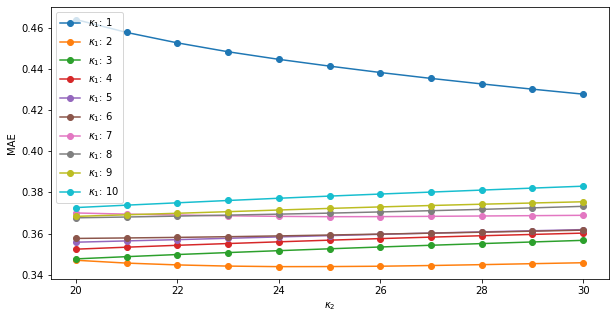

In [8]:
plt.figure(figsize=(10, 5))
for kappa_preprocessing in kappa_values_preprocessing:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_prop_reg in kappa_values_prop_reg]
    plt.plot(kappa_values_prop_reg, mae_values, '-o',label=f"$\kappa_1$: {kappa_preprocessing}")

plt.xlabel('$\kappa_2$')
plt.ylabel('MAE')
plt.legend()
# Save the plot as a PDF
plt.savefig('energy_full.pdf', bbox_inches='tight')

# Display the plot
plt.show()

In [9]:
# Print all the combinations of kappa values and their corresponding MAE values
print("Kappa combinations and their MAE values:")
for (kappa_preprocessing, kappa_prop_reg), mae in cv_results.items():
    print((kappa_preprocessing, kappa_prop_reg, mae))
 
# Print all the combinations of kappa values and their corresponding MAE values
print("Prop_reg kappa and their MAE values:")
for (kappa_preprocessing, kappa_prop_reg), mae in cv_results.items():
    print((kappa_prop_reg, mae))

    

Kappa combinations and their MAE values:
(1, 20, 0.4638829364875801)
(1, 21, 0.45761930178818455)
(1, 22, 0.45256036603936245)
(1, 23, 0.44824105745853615)
(1, 24, 0.44456121003143567)
(1, 25, 0.44126938057982407)
(1, 26, 0.43817235054122683)
(1, 27, 0.4353044711494915)
(1, 28, 0.4326277737165453)
(1, 29, 0.430080639095163)
(1, 30, 0.42766034895594646)
(2, 20, 0.3470140629012359)
(2, 21, 0.3456292210366455)
(2, 22, 0.34474812769140334)
(2, 23, 0.344174932807581)
(2, 24, 0.34390810016843243)
(2, 25, 0.3439460811918504)
(2, 26, 0.344112909226868)
(2, 27, 0.34445877191428687)
(2, 28, 0.3448814190455877)
(2, 29, 0.34535236197750163)
(2, 30, 0.3458102800497801)
(3, 20, 0.3476769559707865)
(3, 21, 0.3487577212516314)
(3, 22, 0.3497896207704148)
(3, 23, 0.35074173198217523)
(3, 24, 0.35166620720071434)
(3, 25, 0.35257745070064883)
(3, 26, 0.35345018287870983)
(3, 27, 0.3542917889844567)
(3, 28, 0.3551030894680468)
(3, 29, 0.3558916088284376)
(3, 30, 0.3566814509818105)
(4, 20, 0.3523910157822

In [10]:
X

,X1,X2,X3,X4,X5,X6,X7,X8
0,2.722222,1.750000,1.714286,1.000000,2.0,0.666667,0.0,0.0
1,2.722222,1.750000,1.714286,1.000000,2.0,1.000000,0.0,0.0
2,2.722222,1.750000,1.714286,1.000000,2.0,1.333333,0.0,0.0
3,2.722222,1.750000,1.714286,1.000000,2.0,1.666667,0.0,0.0
4,2.500000,1.916667,1.857143,1.111111,2.0,0.666667,0.0,0.0
...,...,...,...,...,...,...,...,...
763,1.777778,2.666667,2.000000,2.000000,1.0,1.666667,1.0,1.0
764,1.722222,2.750000,2.142857,2.000000,1.0,0.666667,1.0,1.0
765,1.722222,2.750000,2.142857,2.000000,1.0,1.000000,1.0,1.0
766,1.722222,2.750000,2.142857,2.000000,1.0,1.333333,1.0,1.0
